# Predicting the Nodes that will be Reached on a Citation Network Next Using Monte Carlo Simulations of a Markov Chain

## By Kylie Phommasack

### Project Synopsis
With the Citation Networks being constructed of nodes and edges, where nodes are scholarly articles/research papers while edges represent the connections, I have used Monte Carlo Simulations to collect data on random walks in the network. By using this data, it will help establish the probabilities for the Markov Chain simulations to calculate the chances of visiting the nodes from the random walks. The project aims to answer questions such as node biases that become inherent after conducting random walks and if the count of nodes plays a factor in exhibiting these biases. To complete this project, I used the following libraries: random, pandas, numpy, networkX, and matplotlib to help represent the data I collected visually. 

At the end of this project, I hope to collect data that helps analyze the behavior of Markov chains with various available nodes. The usage of the data collected will help illustrate how certain citations are more favorable than others and bring a further understanding to the selection biases that may become apparent.

Note: I became further interested in this topic due to the readings in this course's textbook

### Resources
- Gøtzsche PC (2021). "Citation bias: questionable research practice or scientific misconduct?": https://www.jameslindlibrary.org/articles/citation-bias-questionable-research-practice-or-scientific-misconduct/Links to an external site.

### Background of the Dataset
- The dataset I chose: https://snap.stanford.edu/data/cit-HepTh.html<br>
- It consists of a collection of papers encompassing high energy physics theory that were found in the arXiv scholarly archive. 
- The data was released as part of research papers in 2003, which includes: <br>
    J. Leskovec, J. Kleinberg and C. Faloutsos. <i>Graphs over Time: Densification Laws, Shrinking Diameters and Possible Explanations.</i> ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD), 2005.<br>
    J. Gehrke, P. Ginsparg, J. M. Kleinberg. <i>Overview of the 2003 KDD Cup.</i> SIGKDD Explorations 5(2): 149-151, 2003.
- There are <b>27770</b> nodes in the dataset
- There are <b>352807</b> edges in the dataset

In [3]:
# Libraries used to produce the project
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random as rnd
import numpy as np

### Now, Let's Analyze the Dataset

Since the .txt file is uploaded to the same directory as this Jupyter Notebook, I am able to directly upload the dataset to this notebook. To ensure that it keeps the format, I will upload using a CSV Read from the Pandas Library. At the bottom, it displays "[352807 rows x 2 columns]" which is the correct amount of edges in the dataset. Therefore, the data was uploaded correctly into this Jupyter Notebook.

In [34]:
dataset_file_path = "cit-HepTh.txt"
        
data_formatted = pd.read_csv(dataset_file_path, sep='\t', skiprows=4, names=["From", "To"]) # Great! So now the data is loaded into this file
print(data_formatted)

           From       To
0          1001  9304045
1          1001  9308122
2          1001  9309097
3          1001  9311042
4          1001  9401139
...         ...      ...
352802  9912286  9805150
352803  9912286  9806074
352804  9912286  9808140
352805  9912286  9810068
352806  9912286  9901023

[352807 rows x 2 columns]


### Let's Convert the Data to a Network

To map out the nodes of this network, the data formatted in Pandas will be converted to NetworkX. Below, is a simple visualization of one of the in going nodes in the graph and the outgoing edges connected to it. Then, once the data is organized in a graph, the number of outgoing nodes for each node will be counted. This will be used further in the project to help with data comparison after the simulations.


In [5]:
to_graph = nx.from_pandas_edgelist(data_formatted, source="From", target="To", edge_attr=None, create_using=nx.DiGraph(), edge_key=None)

# Since the data was formatted in Pandas, it will now be converted to NetworkX

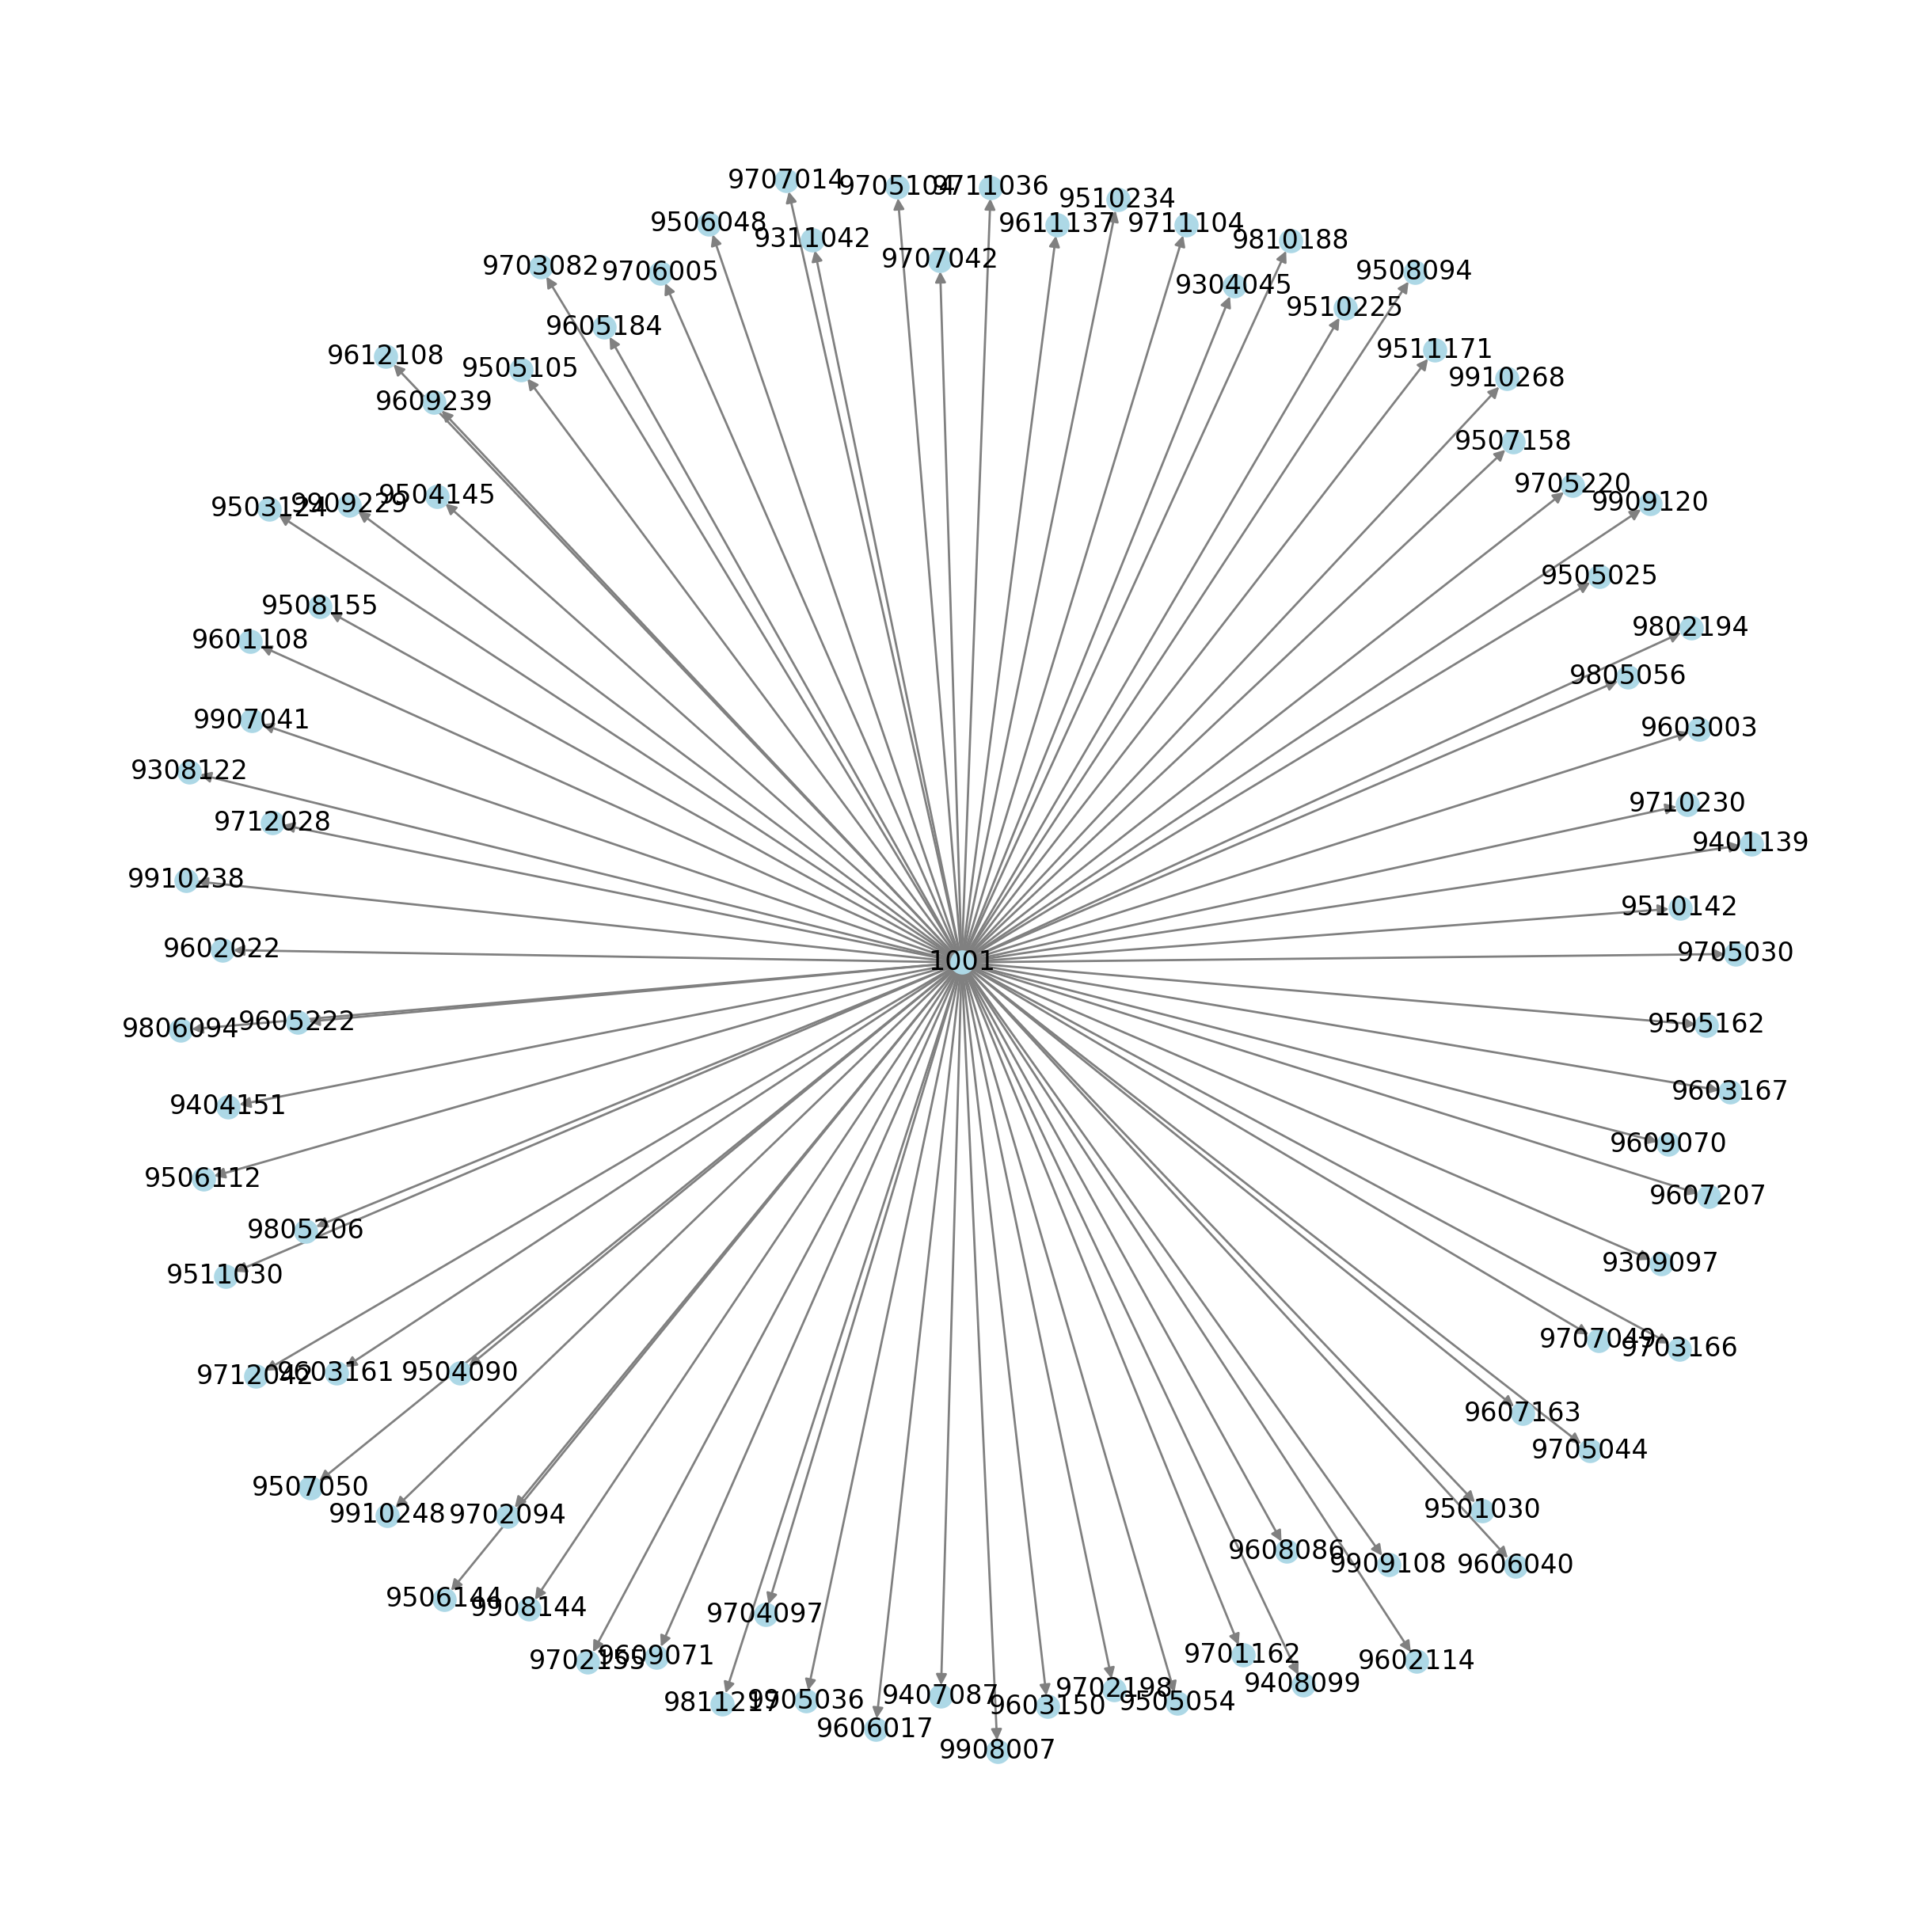

Total number of outgoing nodes for 1001: 83


In [37]:
# Nodes that start at 1001
observed_this_node_only = 1001

observed_node_out_nodes = list(to_graph.successors(observed_this_node_only))

node_count = 0
observed_ng = nx.DiGraph()
observed_ng.add_node(observed_this_node_only)
for i in observed_node_out_nodes:
    observed_ng.add_node(i)
    observed_ng.add_edge(observed_this_node_only, i)
    node_count += 1

plt.figure(figsize=(12,12))
pos = nx.spring_layout(observed_ng)
nx.draw(observed_ng, pos, with_labels=True, node_size=100, node_color='lightblue', edge_color='gray')
plt.show()
print(f"Total number of outgoing nodes for {observed_this_node_only}: {node_count}")

In [38]:
# Compare the Number of Nodes Going Out for Each Going In Node

column_from_list = data_formatted["From"].unique()

collection_of_nodes = {}

for i in column_from_list:
    find_to_nodes = list(to_graph.successors(i))
    node_count = 0
    for k in find_to_nodes:
        node_count += 1
    collection_of_nodes[i] = node_count
    
order_of_collection = sorted(collection_of_nodes.items(), key=lambda item: item[1], reverse=True) # The nodes with the highest number will be ordered first

top = order_of_collection

order_dict = dict(top)

print(" 'From' Node | Number of Nodes")
for i in order_dict:
    print(f'| {i:>10} | {order_dict[i]:>10} |') # Displays node count for each in node

 'From' Node | Number of Nodes
|    9905111 |        562 |
|    9710046 |        359 |
|     110055 |        302 |
|     210157 |        289 |
|     101126 |        274 |
|       7170 |        263 |
|     204089 |        246 |
|     201253 |        226 |
|    9809039 |        216 |
|    9802067 |        214 |
|     109162 |        212 |
|     207116 |        211 |
|    9802051 |        207 |
|    9712253 |        201 |
|     111208 |        200 |
|     209230 |        198 |
|      11197 |        181 |
|     210292 |        180 |
|     209241 |        177 |
|     106048 |        175 |
|     211178 |        170 |
|     210224 |        169 |
|    9807171 |        167 |
|    9611190 |        165 |
|     204253 |        160 |
|    9806199 |        159 |
|       9202 |        158 |
|    9906142 |        157 |
|     211245 |        156 |
|    9906018 |        154 |
|    9909061 |        154 |
|     207130 |        154 |
|     108172 |        149 |
|     206063 |        146 |
|       7195 |   

In [59]:
# Let's Calculate the Average Number of Nodes

running_total = 0
from_nodes = len(collection_of_nodes)
for i in collection_of_nodes:
    running_total += collection_of_nodes[i]
print(f"Average Number of Nodes: {running_total/from_nodes:.4f}\n")

# Let's Calculate the Most Common Number of Nodes

node_count = {}

for i in collection_of_nodes:
    if collection_of_nodes[i] not in node_count:
        node_count[collection_of_nodes[i]] = 1
    else:
        node_count[collection_of_nodes[i]] += 1
        
most_common = max(node_count.items(), key=lambda item: item[1])
print(f"Most Common Number of 'To' Edges: {most_common[0]} - which occurred {most_common[1]} times")

Average Number of Nodes: 14.0791

Most Common Number of 'To' Edges: 1 - which occurred 2449 times


### Perform Monte Carlo Simulations

Now, Monte Carlo Simulations will be performed to collect path data based off the outgoing node connections. First, a random node will be selected and this will be the start of the path. Then, it will check if this node has outgoing nodes. If there are outgoing nodes, it'll randomly select one of those nodes. After that, it will repeat the process with the selected node and chosing the next outgoing node until there are no more steps in the walk or the current node has no outgoing nodes. All 1000 walks and its steps will be saved in the walk_collection list.

Note: The random walk function prevents walks from repeating back and forth to ensure that the data does not have drastic outliers.

In [41]:
# Start a function that generates a small randomization for a node that starts at a random node value 
# Adapted from Project 9 of this course (MATH 725)

def random_walk(G,start,num_steps): # Eliminates the nodes are repeated back and forth
 
    # initialize the visit history
    visited = [start]

    # set up the current node
    cur = start
    prev = None

    # loop over the steps
    for t in range(num_steps):
        
        get_neighbors = [i for i in G.successors(cur) if i != prev]

        if not get_neighbors:
            break
            
        # select a random neighbor of the current node
        next = rnd.choice(get_neighbors)
        prev = cur
        cur = next
        # update the history
        visited.append(cur)

    return visited

In [62]:
# Let's Perform 1 Monte Carlo Simulation that starts at Node 1001

visited = random_walk(to_graph, 1001, 10)
print(f"Nodes in Simulation: {visited}") 

# Observe that the starting node is 1001 since it was hard-coded into this function. The process wil continue until the current node has no more outgoing neighbors

Nodes in Simulation: [1001, 9607207, 9407087, 9211097, 9203066]


In [42]:
num_steps = 150
walk_run_count = 1000 # Number of simulations to run
walk_collection = []

for i in range(walk_run_count): # Take The Walk
    start = rnd.choice(list(to_graph.nodes())) # revising to make it not start solely at 1001
    visited = random_walk(to_graph, start, num_steps)
    walk_collection.append(visited)
    print(f"Simulation #{i+1}: ")
    print(visited)
    count = 0
    for k in visited: # Counts the number nodes that are visited
        count += 1
    print(f"Node Count in Walk: {count}") # Node count is printed after the path
    print("")

# It prints out the nodes that are in the path, starting at a random node each time

Simulation #1: 
[9502148]
Node Count in Walk: 1

Simulation #2: 
[4130, 9906164, 9810070, 9702119, 9502045, 9406017, 9311098]
Node Count in Walk: 7

Simulation #3: 
[212276, 104119, 9906219, 9706140, 9207040, 9202020]
Node Count in Walk: 6

Simulation #4: 
[9909066, 9611115]
Node Count in Walk: 2

Simulation #5: 
[7010, 2251, 9906189, 9811117]
Node Count in Walk: 4

Simulation #6: 
[9508011, 9308142]
Node Count in Walk: 2

Simulation #7: 
[9704104, 9702180, 9702014, 9512219, 9505025, 9404151, 9305139]
Node Count in Walk: 7

Simulation #8: 
[9612195, 9507135, 9408099, 9402005, 9303040, 9202046, 9205068]
Node Count in Walk: 7

Simulation #9: 
[9704088, 9512099]
Node Count in Walk: 2

Simulation #10: 
[9203018]
Node Count in Walk: 1

Simulation #11: 
[109018, 8075, 8042, 7204, 9711162, 101093]
Node Count in Walk: 6

Simulation #12: 
[9702042, 9510087, 9412228, 9202021]
Node Count in Walk: 4

Simulation #13: 
[9509134, 9210010]
Node Count in Walk: 2

Simulation #14: 
[212166, 209215, 20202

Simulation #154: 
[102031, 9901001, 9709013, 9701137, 9602049, 9207050, 9203051]
Node Count in Walk: 7

Simulation #155: 
[9602056, 9502156, 9402073, 9205046]
Node Count in Walk: 4

Simulation #156: 
[9909104, 9406180, 9310060, 9206034]
Node Count in Walk: 4

Simulation #157: 
[12054, 5204, 5040, 9908152, 9903205, 9804188, 9711165, 9710009, 9704089, 9703016, 9506199, 9501144, 9312094, 9305072]
Node Count in Walk: 14

Simulation #158: 
[106167, 9804034, 9702203, 9612126, 9607145, 9407111, 9305068]
Node Count in Walk: 7

Simulation #159: 
[203142, 6077, 9611213, 9602062, 9601077, 9501068, 9304154, 9206016]
Node Count in Walk: 8

Simulation #160: 
[9405011, 9303139]
Node Count in Walk: 2

Simulation #161: 
[9708067, 9706141, 9612128, 9408099, 9402002, 9208078]
Node Count in Walk: 6

Simulation #162: 
[9808036, 9705052, 9612194, 9509110, 9504105, 9503109, 9310041, 9301068]
Node Count in Walk: 8

Simulation #163: 
[9607107, 9603009, 9512145, 9506194, 9501068, 9207053]
Node Count in Walk: 6


Simulation #328: 
[303022, 9607065, 9502100, 9404024, 9306067]
Node Count in Walk: 5

Simulation #329: 
[210068, 8081, 9802150, 9703040, 9608108, 9601029, 9308100]
Node Count in Walk: 7

Simulation #330: 
[201106, 9907214, 9612080, 9611159, 9610249, 9512077, 9510017, 9504090, 9309152, 9204025]
Node Count in Walk: 10

Simulation #331: 
[9805087, 9405171]
Node Count in Walk: 2

Simulation #332: 
[9611038, 9402077, 9310032]
Node Count in Walk: 3

Simulation #333: 
[9608142]
Node Count in Walk: 1

Simulation #334: 
[9501033, 9203039]
Node Count in Walk: 2

Simulation #335: 
[9807080, 9802150, 9410073, 9204031]
Node Count in Walk: 4

Simulation #336: 
[207050, 207034, 204033, 203124, 11256, 9802042, 9709220, 9708034, 9703030, 9501022, 9408074, 9212062]
Node Count in Walk: 12

Simulation #337: 
[207201, 112095, 106124, 9902180, 9806074, 9805105, 9802109, 9703040, 9604166, 9512031, 9505052, 9206006, 9205037]
Node Count in Walk: 13

Simulation #338: 
[9712148, 9711094, 9709013, 9702180, 951122

Simulation #767: 
[9908206, 9407059, 9309099, 9207066]
Node Count in Walk: 4

Simulation #768: 
[211122, 112044, 9808038, 9805217, 9802150, 9712021, 9710009, 9704080, 9603127, 9510161, 9507158, 9506150, 9503124, 9408083, 9402002, 9208055, 9201019]
Node Count in Walk: 17

Simulation #769: 
[101107, 9410046, 9311120, 9207053]
Node Count in Walk: 4

Simulation #770: 
[112261, 9908208, 9808190, 9802051, 9607082, 9305185, 9209016]
Node Count in Walk: 7

Simulation #771: 
[9402140, 9204083]
Node Count in Walk: 2

Simulation #772: 
[7081, 9907071, 9512179, 9401153, 9302119]
Node Count in Walk: 5

Simulation #773: 
[9504147, 9501068, 9304154, 9209016]
Node Count in Walk: 4

Simulation #774: 
[9308128]
Node Count in Walk: 1

Simulation #775: 
[9707101, 9706166, 9509156, 9504100]
Node Count in Walk: 4

Simulation #776: 
[9906197, 9811033, 9204099]
Node Count in Walk: 3

Simulation #777: 
[9707012, 9607157, 9510209, 9501068, 9307049, 9209116, 9201061]
Node Count in Walk: 7

Simulation #778: 
[112

### Analyze Data Collected from Simulations

Now, after completing the random walks, it will iterate through all the steps from all the walks and count the nodes visited. This will help calculate the frequencies of the nodes observed based off how many times they're visited. Then, the number of times it is visited will compared to the actual count of the node.

In [19]:
# Let's analyze the difference between nodes with more outgoing edges than the others

count_visits_for_nodes = dict() # stores the nodes and the number of times they're visited

for i in walk_collection:
    for k in i:
        if k not in count_visits_for_nodes:
            count_visits_for_nodes[k] = 1
        else:
            count_visits_for_nodes[k] += 1

sorted_visit_count = sorted(count_visits_for_nodes.items(), key=lambda item: item[1], reverse=True)

In [66]:
# Compare node count to actual counts

compare_dict = dict()

for i in order_dict:
    n = int(i)
    if n in count_visits_for_nodes:
        value = count_visits_for_nodes[n]/order_dict[n]
        compare_dict[n] = value    
        print(f"Node #{n} - {value:.5f}")

Node #9905111 - 0.00534
Node #204089 - 0.00813
Node #9802067 - 0.00935
Node #106048 - 0.00571
Node #9806199 - 0.00629
Node #9202 - 0.00633
Node #9710231 - 0.00826
Node #303185 - 0.00833
Node #9910053 - 0.01020
Node #9611184 - 0.01031
Node #209169 - 0.01042
Node #9901050 - 0.01099
Node #9611203 - 0.01176
Node #1001 - 0.01205
Node #9709062 - 0.01205
Node #107166 - 0.01220
Node #105059 - 0.01235
Node #203124 - 0.01250
Node #9506171 - 0.01282
Node #107032 - 0.01316
Node #9908142 - 0.12000
Node #9607235 - 0.02667
Node #9904207 - 0.02740
Node #11048 - 0.01370
Node #304180 - 0.01370
Node #9707126 - 0.01389
Node #9901135 - 0.01389
Node #9611050 - 0.09859
Node #9812196 - 0.01449
Node #12251 - 0.01449
Node #205311 - 0.01449
Node #9810201 - 0.01471
Node #9607201 - 0.05882
Node #105048 - 0.01493
Node #9509106 - 0.01493
Node #9608117 - 0.04615
Node #3187 - 0.01538
Node #207257 - 0.01538
Node #9803232 - 0.01562
Node #1083 - 0.01562
Node #206175 - 0.01562
Node #105168 - 0.01587
Node #9804058 - 0.0322

### Transition Matrix and Markov Chain Simulations

Then, a transition matrix will be built to evaluate the chance of the outgoing node being selected as the next node based on its probability. This probability is calculated based off the nodes visit total compared to actual counts in the previous code box. All the outgoing node probabilities are added together and each outgoing node gets a value based off the previous code box value divided by the total count. After, 1000 simulations are the start node is by random. Then, the following nodes are chosen by random using the probabilities for the outgoing nodes.

In [21]:
# Builds the transition matrix based off the outgoing nodes for each of the nodes. Uses the values collected from above to determine it's weight in the transition matrix
transition_matrix = {}

node_graph = {}

for i in to_graph.nodes():
    node_graph[i] = list(to_graph.successors(i))    

for i in node_graph:
    out_nodes = node_graph[i]
    
    # calculate the sum of the weights for all the nodes
    total = 0
    for k in out_nodes:
        if k in compare_dict:
            total += compare_dict[k]
    
    # what happens if there is no weight for all the out-going nodes?
    if total == 0 and len(out_nodes) > 0:
        transition_matrix[i] = {}
        weight = 1 / len(out_nodes)
        for o in out_nodes:
            transition_matrix[i][o] = weight
        continue                  
        
    # builds the matrix for the outgoing nodes and its weight
    transition_matrix[i] = {}
    for o in out_nodes:
        if o in compare_dict:
            transition_matrix[i][o] = compare_dict[o] / total
        else:
            transition_matrix[i][o] = 0

In [31]:
def markov_chain_simulation(initial, transition_matrix, states, num_steps):
    # get the starting node
    current_index = np.random.choice(len(states), p=initial)
    current = states[current_index]
    created_path = [current]
    print(current)
    
    
    while num_steps != 0: # continue until no steps are left
        get_out_nodes = transition_matrix[current]
        
        if len(get_out_nodes) == 0: # no nodes left with a probability since they were not visited during the random walks
            break
        next_nodes = list(get_out_nodes.keys())
        chances = np.array(list(get_out_nodes.values()))
        
        next_node = np.random.choice(next_nodes, p=chances) # get the next node
        
        created_path.append(int(next_node))
        current = next_node
        num_steps -= 1
    
    return created_path

In [58]:
# Let's produce 1 Markov Chain Simulation to see what it does

path = markov_chain_simulation(initial, transition_matrix, initial_states, 100)
print(f"Nodes in Path: {path}") 

# The first node is it the node it randomly starts at. Then, it will continue to simulation until the node it's on has no outgoing nodes or a 0 probability since it was not observed in the previous Monte Carlo Simulations.

101186
Nodes in Path: [101186, 9089, 9210127, 208020]


In [32]:
path_collection = []

initial_states = list(transition_matrix.keys())
initial = np.ones(len(initial_states)) / len(initial_states)     
markov_chain_run_count = 1000

for i in range(markov_chain_run_count): # Take The Run
    path = markov_chain_simulation(initial, transition_matrix, initial_states, 100)
    path_collection.append(path)
    print(f"Nodes in Path: {path}")
    count = 0
    for k in path: # Counts the number nodes that are visited
        count += 1
    print(f"Node Count in Walk: {count}") # Node count is printed after the path
    print("")

9412040
Nodes in Path: [9412040, 9406081]
Node Count in Walk: 2

103029
Nodes in Path: [103029, 9211114, 9206047]
Node Count in Walk: 3

9201026
Nodes in Path: [9201026]
Node Count in Walk: 1

9307092
Nodes in Path: [9307092, 9204103]
Node Count in Walk: 2

9712228
Nodes in Path: [9712228, 9702022, 9212068, 9201058]
Node Count in Walk: 4

208177
Nodes in Path: [208177, 9707123, 9503124, 9411149, 9403198, 9402044]
Node Count in Walk: 6

202113
Nodes in Path: [202113, 12208, 8114, 5122, 9405029, 9212147]
Node Count in Walk: 6

206105
Nodes in Path: [206105, 9212035, 9202014]
Node Count in Walk: 3

205180
Nodes in Path: [205180, 9906064, 9910093, 9906064, 9910093, 9910093, 9906064, 9711200, 9307049, 9209116, 9202075]
Node Count in Walk: 11

9912273
Nodes in Path: [9912273, 9803015, 9601038, 9210127, 208020]
Node Count in Walk: 5

9903040
Nodes in Path: [9903040, 9606037, 9511192, 9506069, 9409113, 9309055, 9307001]
Node Count in Walk: 7

9306109
Nodes in Path: [9306109, 9211025, 9201004]


Nodes in Path: [111038, 1032, 9909081, 9908142, 9711165, 9401139, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016]
Node Count in Walk: 101

9810083
Nodes in Path: [9810083, 9802109, 9510017, 950

7211
Nodes in Path: [7211, 9802109, 9510017, 9407031, 9212085, 9201054]
Node Count in Walk: 6

9909119
Nodes in Path: [9909119, 9711200, 9209116, 9202004]
Node Count in Walk: 4

9511164
Nodes in Path: [9511164, 9507012, 9404151, 9309140, 9302103, 9204102]
Node Count in Walk: 6

9809019
Nodes in Path: [9809019, 9705006, 9703083]
Node Count in Walk: 3

9807010
Nodes in Path: [9807010, 9607022]
Node Count in Walk: 2

9904185
Nodes in Path: [9904185, 9904204, 9310144, 9201036]
Node Count in Walk: 4

9703084
Nodes in Path: [9703084, 9401139, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016

9912167
Nodes in Path: [9912167, 9908142, 9711165, 9709220, 9701025, 9610043, 9409089, 9402125, 9306069, 9207034, 9201061]
Node Count in Walk: 11

9210127
Nodes in Path: [9210127, 208020]
Node Count in Walk: 2

9704012
Nodes in Path: [9704012, 9610113, 9601148, 9407087, 9211097, 9203066]
Node Count in Walk: 6

9706191
Nodes in Path: [9706191, 9308106, 9206036]
Node Count in Walk: 3

9801055
Nodes in Path: [9801055, 9602052, 9511173, 9503124, 9402002, 9211056, 9205081]
Node Count in Walk: 7

9311165
Nodes in Path: [9311165]
Node Count in Walk: 1

105305
Nodes in Path: [105305, 9608096, 9302103, 9204102]
Node Count in Walk: 4

9404071
Nodes in Path: [9404071, 9210012, 9206055, 9201061]
Node Count in Walk: 4

9509001
Nodes in Path: [9509001, 9312004]
Node Count in Walk: 2

302106
Nodes in Path: [302106, 9301083, 9201056]
Node Count in Walk: 3

207267
Nodes in Path: [207267, 104081, 9410167, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 9201015, 9207016, 

9609128
Nodes in Path: [9609128, 9607174, 9604128, 9503230]
Node Count in Walk: 4

9411101
Nodes in Path: [9411101, 9309041, 9209111, 9201056]
Node Count in Walk: 4

11258
Nodes in Path: [11258, 9907208, 9902064, 9409113, 9309055, 9307001]
Node Count in Walk: 6

9611046
Nodes in Path: [9611046, 9408061, 9406049, 9205115]
Node Count in Walk: 4

9711134
Nodes in Path: [9711134, 9708046, 9407101, 9212049]
Node Count in Walk: 4

205062
Nodes in Path: [205062, 108040, 9506019, 9402077, 9301114]
Node Count in Walk: 5

9701021
Nodes in Path: [9701021, 9407051]
Node Count in Walk: 2

9810003
Nodes in Path: [9810003, 9807068, 9702034]
Node Count in Walk: 3

9406071
Nodes in Path: [9406071, 9209115, 9201020]
Node Count in Walk: 3

4130
Nodes in Path: [4130, 9701125, 9503124, 9501030, 9211056, 9205051]
Node Count in Walk: 6

9912059
Nodes in Path: [9912059, 9711200, 9209116, 9202004]
Node Count in Walk: 4

301170
Nodes in Path: [301170, 9405135]
Node Count in Walk: 2

109088
Nodes in Path: [10908

### Analyze Data Collected from Simulations

Once the simulations are completed, the paths are collected and each node counted for the amount of times it was visited throughout all the paths. All the node counts are summed together and this calculates the average based off a node's visit count divided by the overall count. These values are useful as they help determine the biases presented by the nodes.

In [43]:
# Now, we'll analyze the nodes of each path
count_nodes = dict() # stores the nodes and the number of times they're visited

total = 0

for i in path_collection:
    for k in i:
        if k not in count_nodes:
            count_nodes[k] = 1
        else:
            count_nodes[k] += 1
        total += 1

sorted_count = sorted(count_nodes.items(), key=lambda item: item[1], reverse=True)

average_for_each_node = dict() # collects the average based off the total number of nodes visited (duplicates included) to that specific node's visit count
for i in count_nodes:
    average_for_each_node[i] = count_nodes[i] / total
    
sorted_average = sorted(average_for_each_node.items(), key=lambda item: item[1], reverse=True)

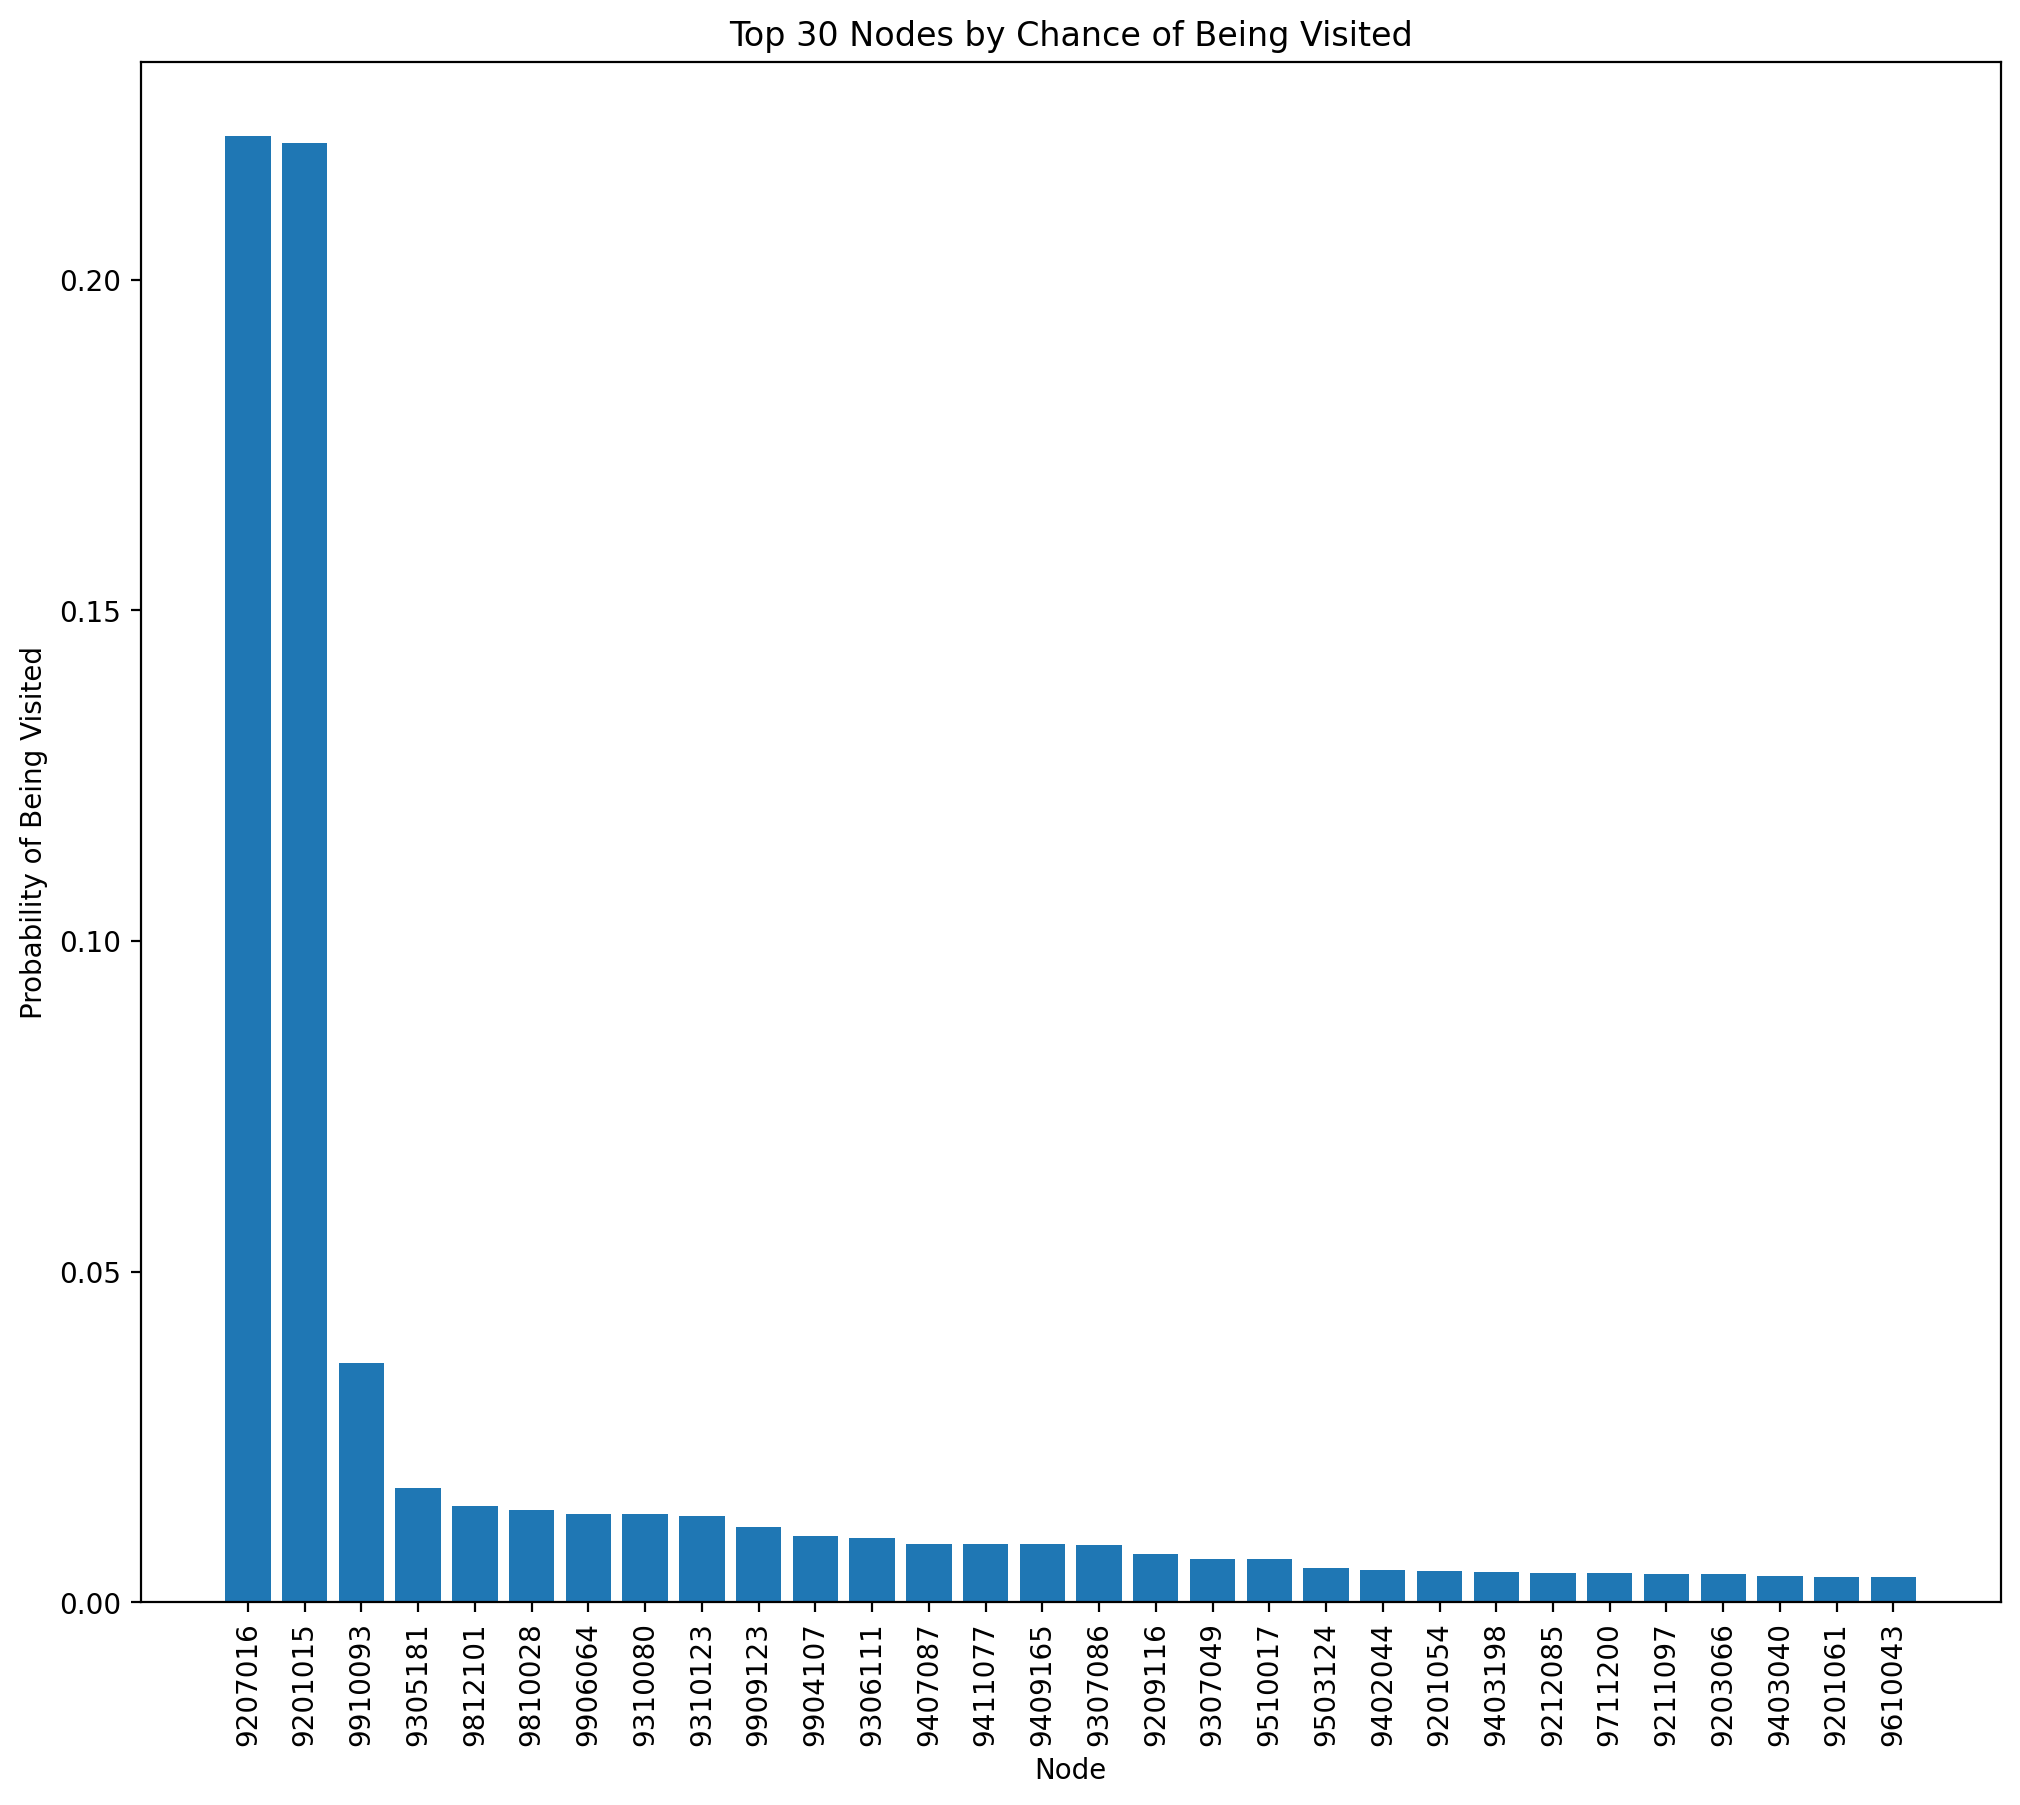

In this graph, it indicates the frequency of the nodes after completing the Markov Chains. It is apparent that there is a bias in the random walks.


In [49]:
first_average_nodes = sorted_average[:30]

nodes_side = []
generate_val = []

for i, j in first_average_nodes:
    nodes_side.append(str(i))
    generate_val.append(j)
    

plt.figure(figsize=(12,10))
plt.bar( nodes_side, generate_val)
plt.xticks(rotation=90)
plt.xlabel("Node")
plt.ylabel("Probability of Being Visited")
plt.title("Top 30 Nodes by Chance of Being Visited")
plt.show()

print("In this graph, it indicates the frequency of the nodes after completing the Markov Chains. It is apparent that there is a bias in the random walks.")

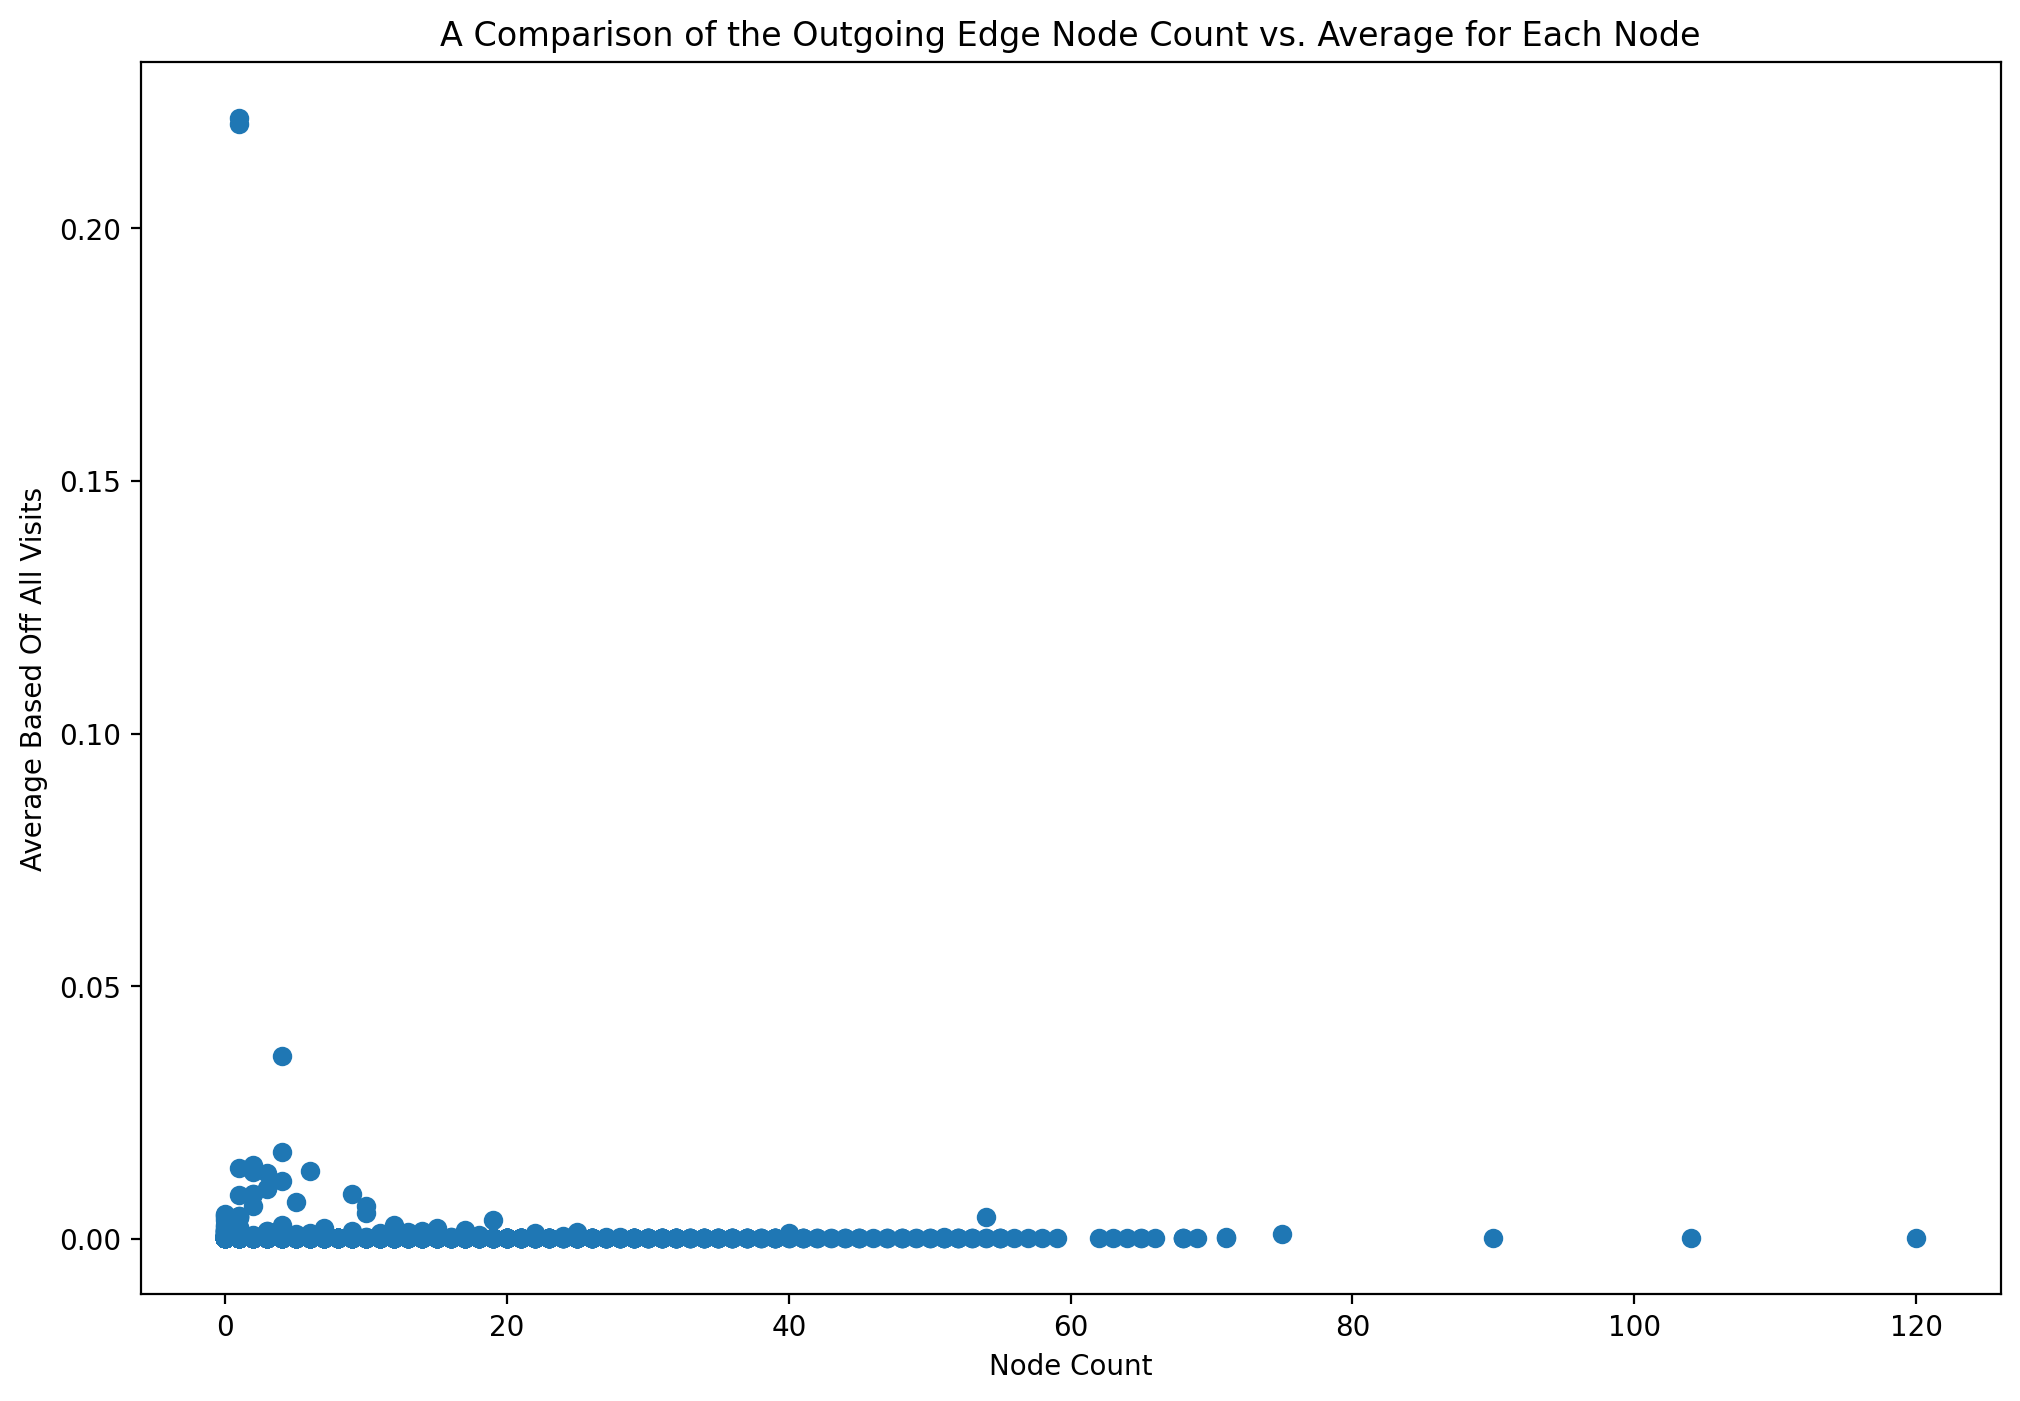

It can be observed that nodes with a lower outgoing degree have a higher average. This demonstrates a bias in the network since those nodes with many outgoing nodes more nodes to distribute the probability compared to those with very few outgoing nodes.


In [55]:
# Compose a graph that compare number of outgoing nodes in the original graph to the visit calculation for each node that is created through the Markov Chains

compare_values = []

outgoing_count = dict(G.out_degree())

for i in average_for_each_node:
    if i in outgoing_count:
        compare_values.append((average_for_each_node[i], outgoing_count[i]))
        
        
counts = [] 
avg = []
for i, j in compare_values:
    counts.append(j)
    avg.append(i)

plt.figure(figsize=(12,8))
plt.scatter(counts, avg)
plt.xlabel("Node Count")
plt.ylabel("Average Based Off All Visits")
plt.title("A Comparison of the Outgoing Edge Node Count vs. Average for Each Node")
plt.show()

print("It can be observed that nodes with a lower outgoing degree have a higher average. This demonstrates a bias in the network since those nodes with many outgoing nodes more nodes to distribute the probability compared to those with very few outgoing nodes.")

### Conclusion

Overall, this project was rewarding and complicated at the same time. At the start of the project, I was confident that I would complete my project based off the World Wide Web. However, as I was selecting data to use for this project, I decided that Citation Networks tend to align more with my overall goal for the project. Therefore, once I found the .txt file to use for the project, I had to learn how to use the Pandas library to import the data in the Jupyter Notebook. There were many commands that I was unfamiliar with, but I observed their usefulness as I continued to build on this project. As I continued on, I found that printing out the data or the graphs it created helped me understand the data and how it is organized. As a result, when I started working on the Monte Carlo Simulations, I knew exactly what I was doing. A big challenge that I found was creating the Markov Chains. I consulted outside resources such as DataCamp and GeeksForGeeks to understand how to write the language in Python. In the end, it is apparent that the simulations demonstrated biases. In the graph above, I noticed that 2 of the nodes have a higher frequency than the other nodes. To sum up, this project introduced me to important concepts including data analysis in Python and implementing mathematics in coding languages.